In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
data = pd.read_csv("C:/Users/saini/Documents/Minor Project/data/archive/AMZN_data.csv")

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [5]:
amzn_data = data [['date','open','close']] 
amzn_data .head()

,date,open,close
0,2013-02-08,261.40,261.95
1,2013-02-11,263.20,257.21
2,2013-02-12,259.19,258.70
3,2013-02-13,261.53,269.47
4,2013-02-14,267.37,269.24


In [6]:
### splitting to train and test data
training_size = round(len(amzn_data) * 0.80)
train_data = amzn_data [:training_size]
test_data  = amzn_data [training_size:]

In [7]:
###converting date to date time object
train_data = amzn_data[:training_size].iloc[:,:2] 
train_data['date'] = pd.to_datetime(train_data['date'])  # converting to date time object
train_data

test_data = amzn_data[:training_size].iloc[:,:2] 
test_data['date'] = pd.to_datetime(test_data['date'])  # converting to date time object
test_data

,date,open
0,2013-02-08,261.40
1,2013-02-11,263.20
2,2013-02-12,259.19
3,2013-02-13,261.53
4,2013-02-14,267.37
...,...,...
1002,2017-02-01,829.21
1003,2017-02-02,836.59
1004,2017-02-03,806.72
1005,2017-02-06,809.80


In [8]:
##Getting the values of the column "open"
dataset_train = train_data.open.values
dataset_train.shape

# Change 1d array to 2d array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

###Normalization/Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(1007, 1)

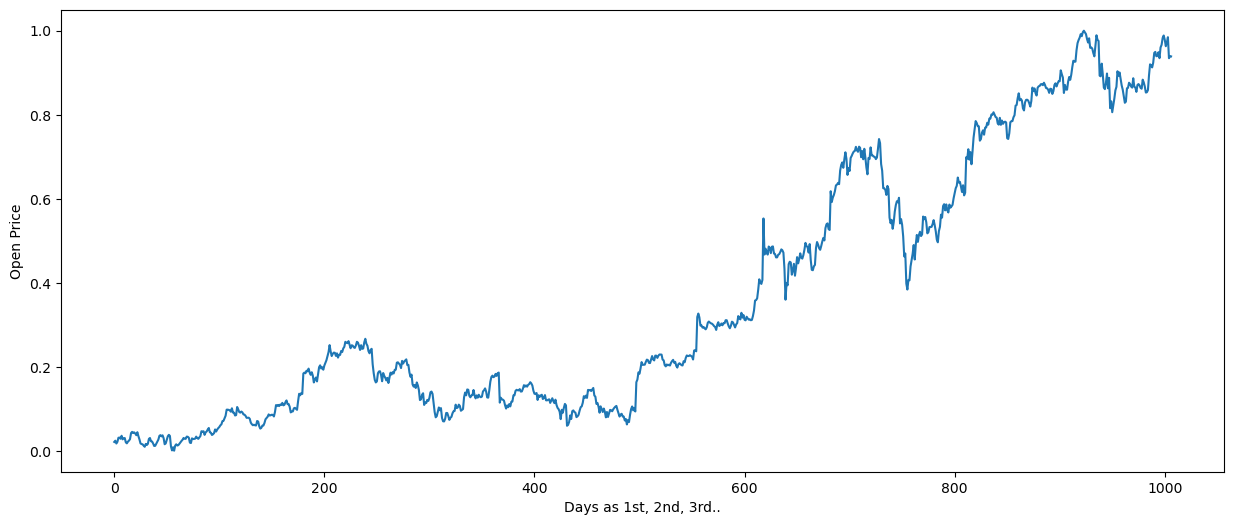

In [9]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [10]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, training_size):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (957, 50, 1)
Shape of y_train after reshape : (957, 1)


In [24]:
!pip3 install numpy --upgrade

In [13]:
####Creating the RNN model
import keras
import tensorflow as tf
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
30/30 [==============================] - 6s 39ms/step - loss: 0.4276 - accuracy: 0.0000e+00
Epoch 2/50
30/30 [==============================] - 1s 39ms/step - loss: 0.3019 - accuracy: 0.0021
Epoch 3/50
30/30 [==============================] - 1s 36ms/step - loss: 0.2326 - accuracy: 0.0021
Epoch 4/50
30/30 [==============================] - 1s 39ms/step - loss: 0.1783 - accuracy: 0.0021
Epoch 5/50
30/30 [==============================] - 1s 37ms/step - loss: 0.1470 - accuracy: 0.0010
Epoch 6/50
30/30 [==============================] - 1s 35ms/step - loss: 0.1040 - accuracy: 0.0021
Epoch 7/50
30/30 [==============================] - 1s 37ms/step - loss: 0.0858 - accuracy: 0.0021
Epoch 8/50
30/30 [==============================] - 1s 35ms/step - loss: 0.0791 - accuracy: 0.0021
Epoch 9/50
30/30 [==============================] - 1s 35ms/step - loss: 0.0635 - accuracy: 0.0010
Epoch 10/50
30/30 [==============================] - 1s 38ms/step - loss: 0.0550 - accuracy: 0.0021
Epoch

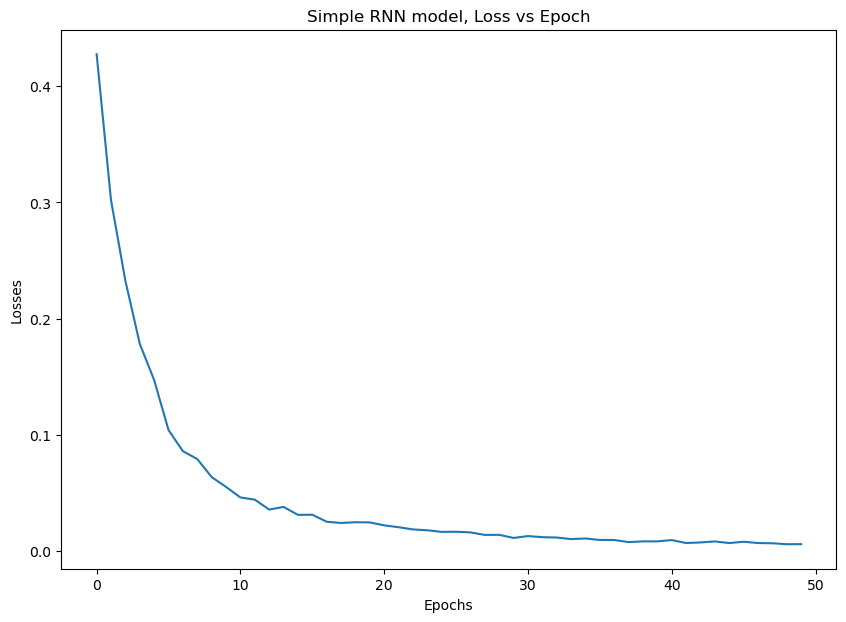

In [14]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

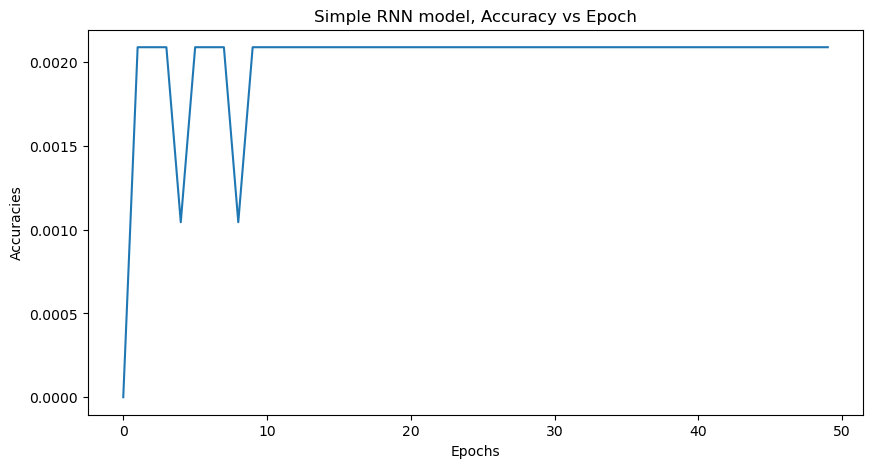

In [15]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [16]:
###Model Predictions for train data
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

30/30 [==============================] - 1s 10ms/step


(957, 1)

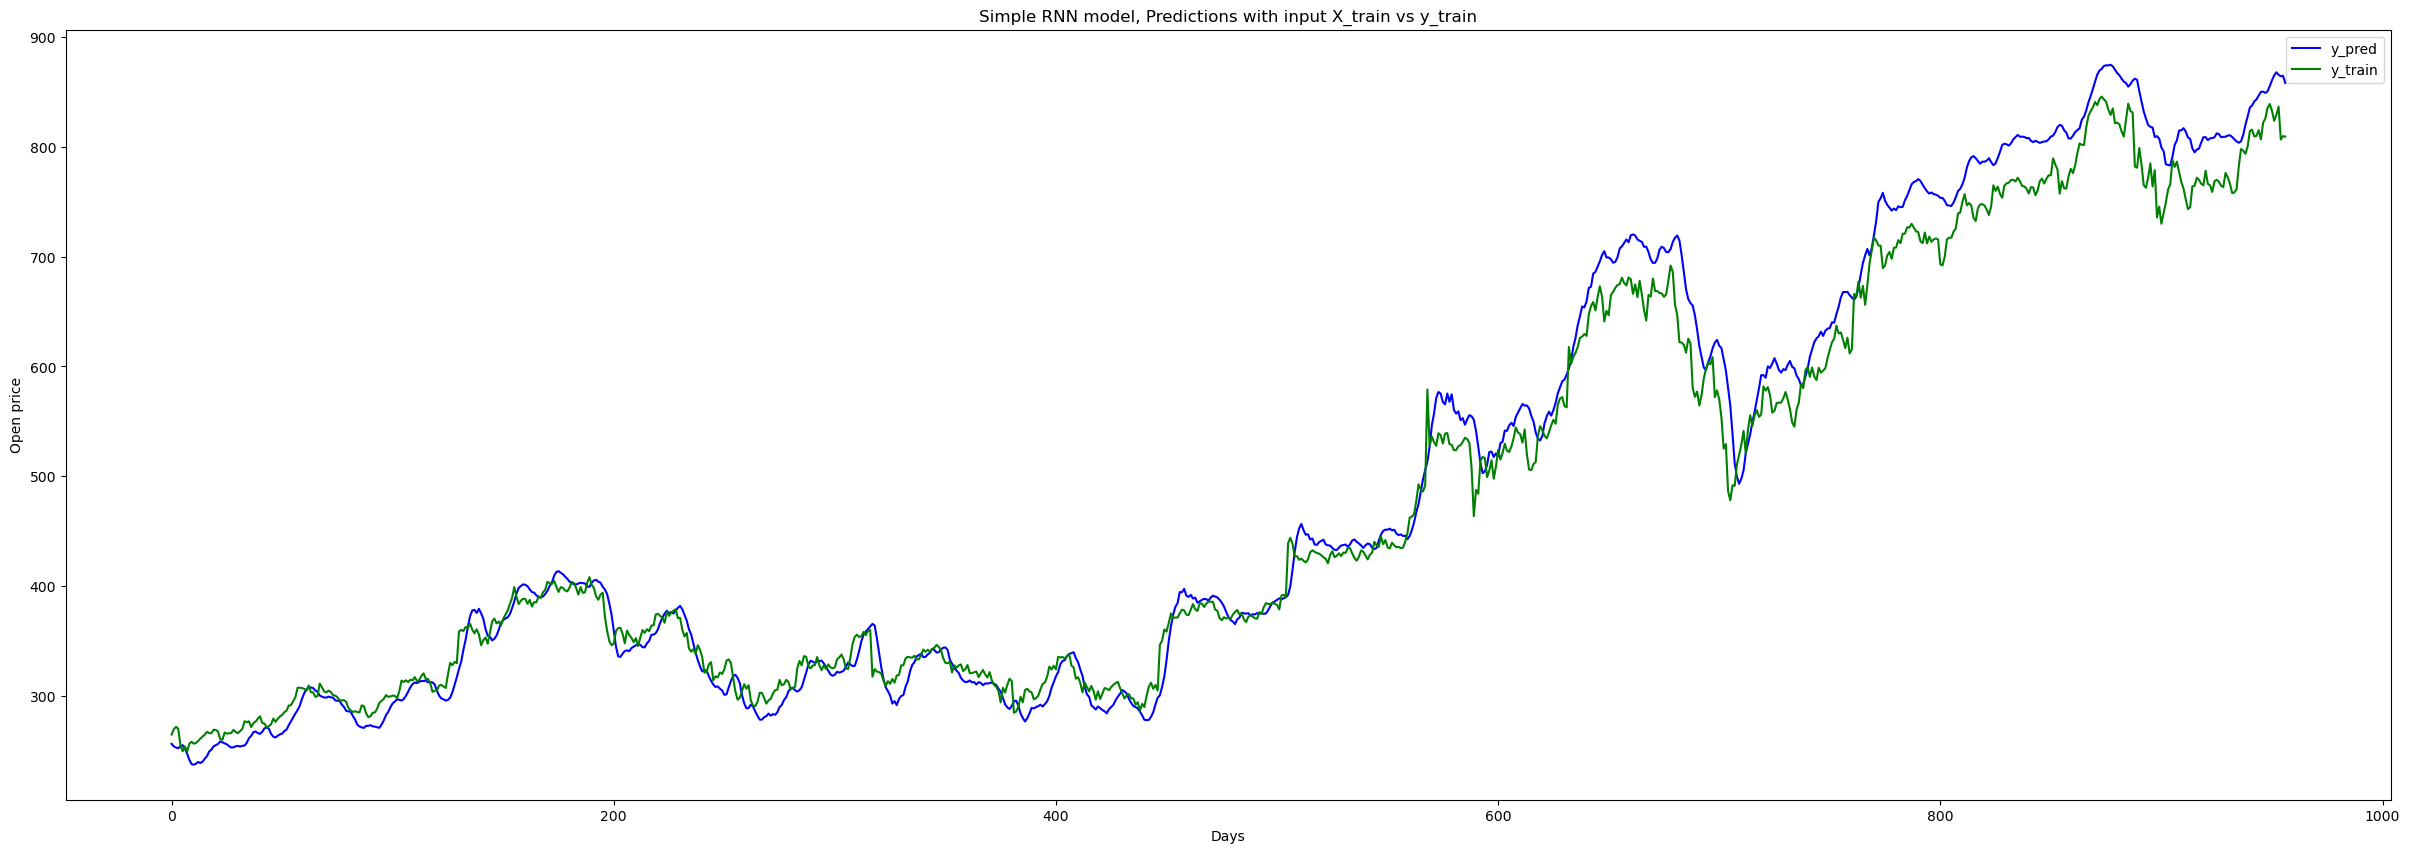

In [17]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [19]:
##Getting the values of the column "open"
dataset_validation = test_data.open.values
dataset_validation.shape

# Change 1d array to 2d array
dataset_validation = np.reshape(dataset_validation, (-1,1))
dataset_validation.shape

###Normalization/Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_test_scaled = scaler.fit_transform(dataset_validation)
dataset_test_scaled.shape

(1007, 1)

In [20]:
# Creating X_test and y_test
X_test = []
y_test = []

time_step = 50

for i in range(time_step, training_size):
    X_test.append(dataset_test_scaled[i-time_step:i,0])
    y_test.append(dataset_test_scaled[i,0])
    
# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (957, 50, 1)
Shape of y_test after reshape : (957, 1)


In [21]:
###Evaluating with X_test data

# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

30/30 [==============================] - 0s 10ms/step
Shape of y_pred_of_test : (957, 1)


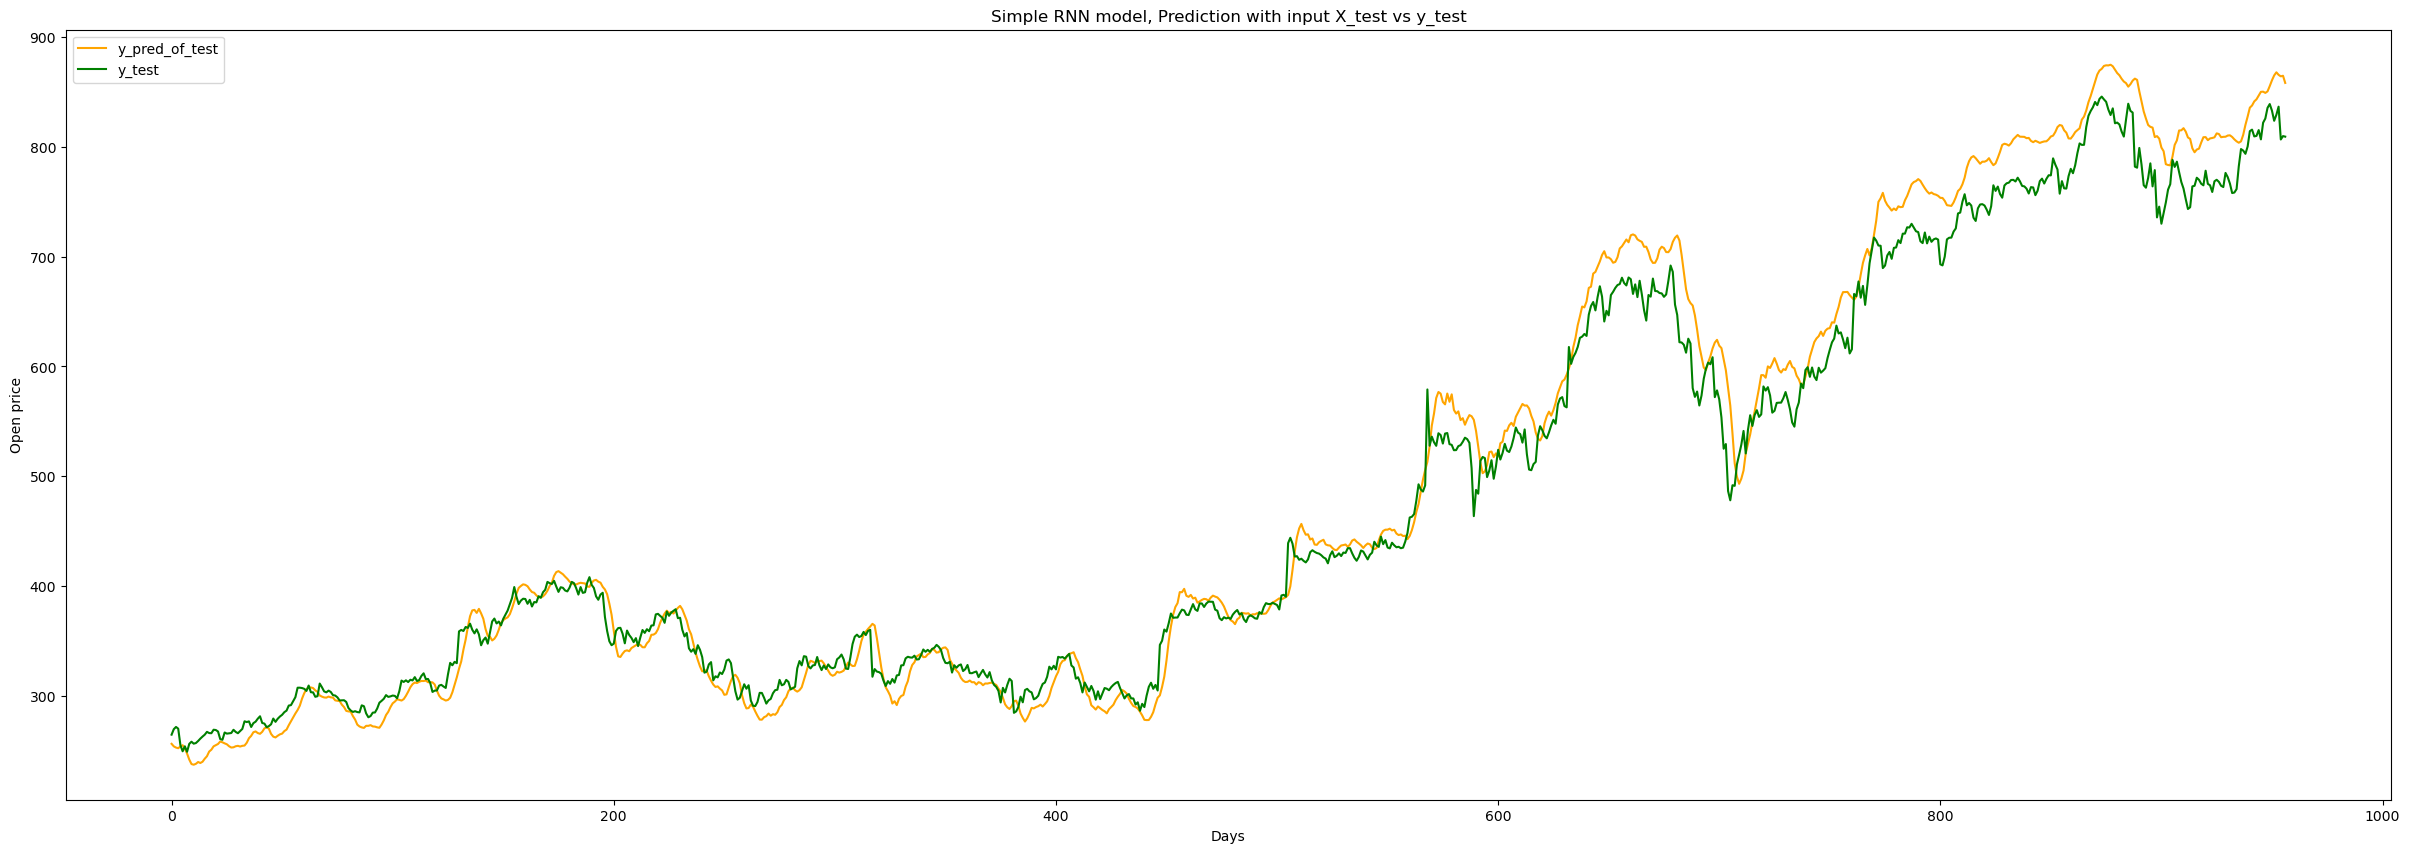

In [22]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

In [23]:
y_train = scaler.fit_transform(y_train)

In [24]:
###Creating the LSTM model
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
96/96 [==============================] - 8s 37ms/step - loss: 0.0099 - accuracy: 0.0021
Epoch 2/10
96/96 [==============================] - 4s 38ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 3/10
96/96 [==============================] - 3s 32ms/step - loss: 0.0010 - accuracy: 0.0021
Epoch 4/10
96/96 [==============================] - 3s 33ms/step - loss: 0.0011 - accuracy: 0.0021
Epoch 5/10
96/96 [==============================] - 3s 34ms/step - loss: 8.4274e-04 - accuracy: 0.0021
Epoch 6/10
96/96 [==============================] - 4s 45ms/step - loss: 7.4743e-04 - accuracy: 0.0021
Epoch 7/10
96/96 [==============================] - 4s 39ms/step - loss: 7.0220e-04 - accuracy: 0.0021
Epoch 8/10
96/96 [==============================] - 3s 33ms/step - loss: 9.8424e-04 - accuracy: 0.0021
Epoch 9/10
96/96 [==============================] - 3s 31ms/step - loss: 7.7468e-04 - accuracy: 0.0021
Epoch 10/10
96/96 [==============================] - 3s 34ms/step - loss: 6.4925e-04 - ac

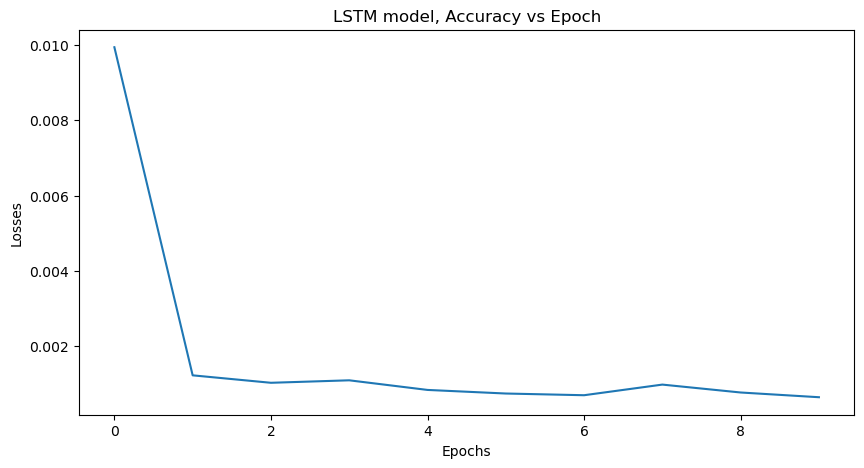

In [25]:
###Evaluating the LSTM model
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

30/30 [==============================] - 1s 16ms/step


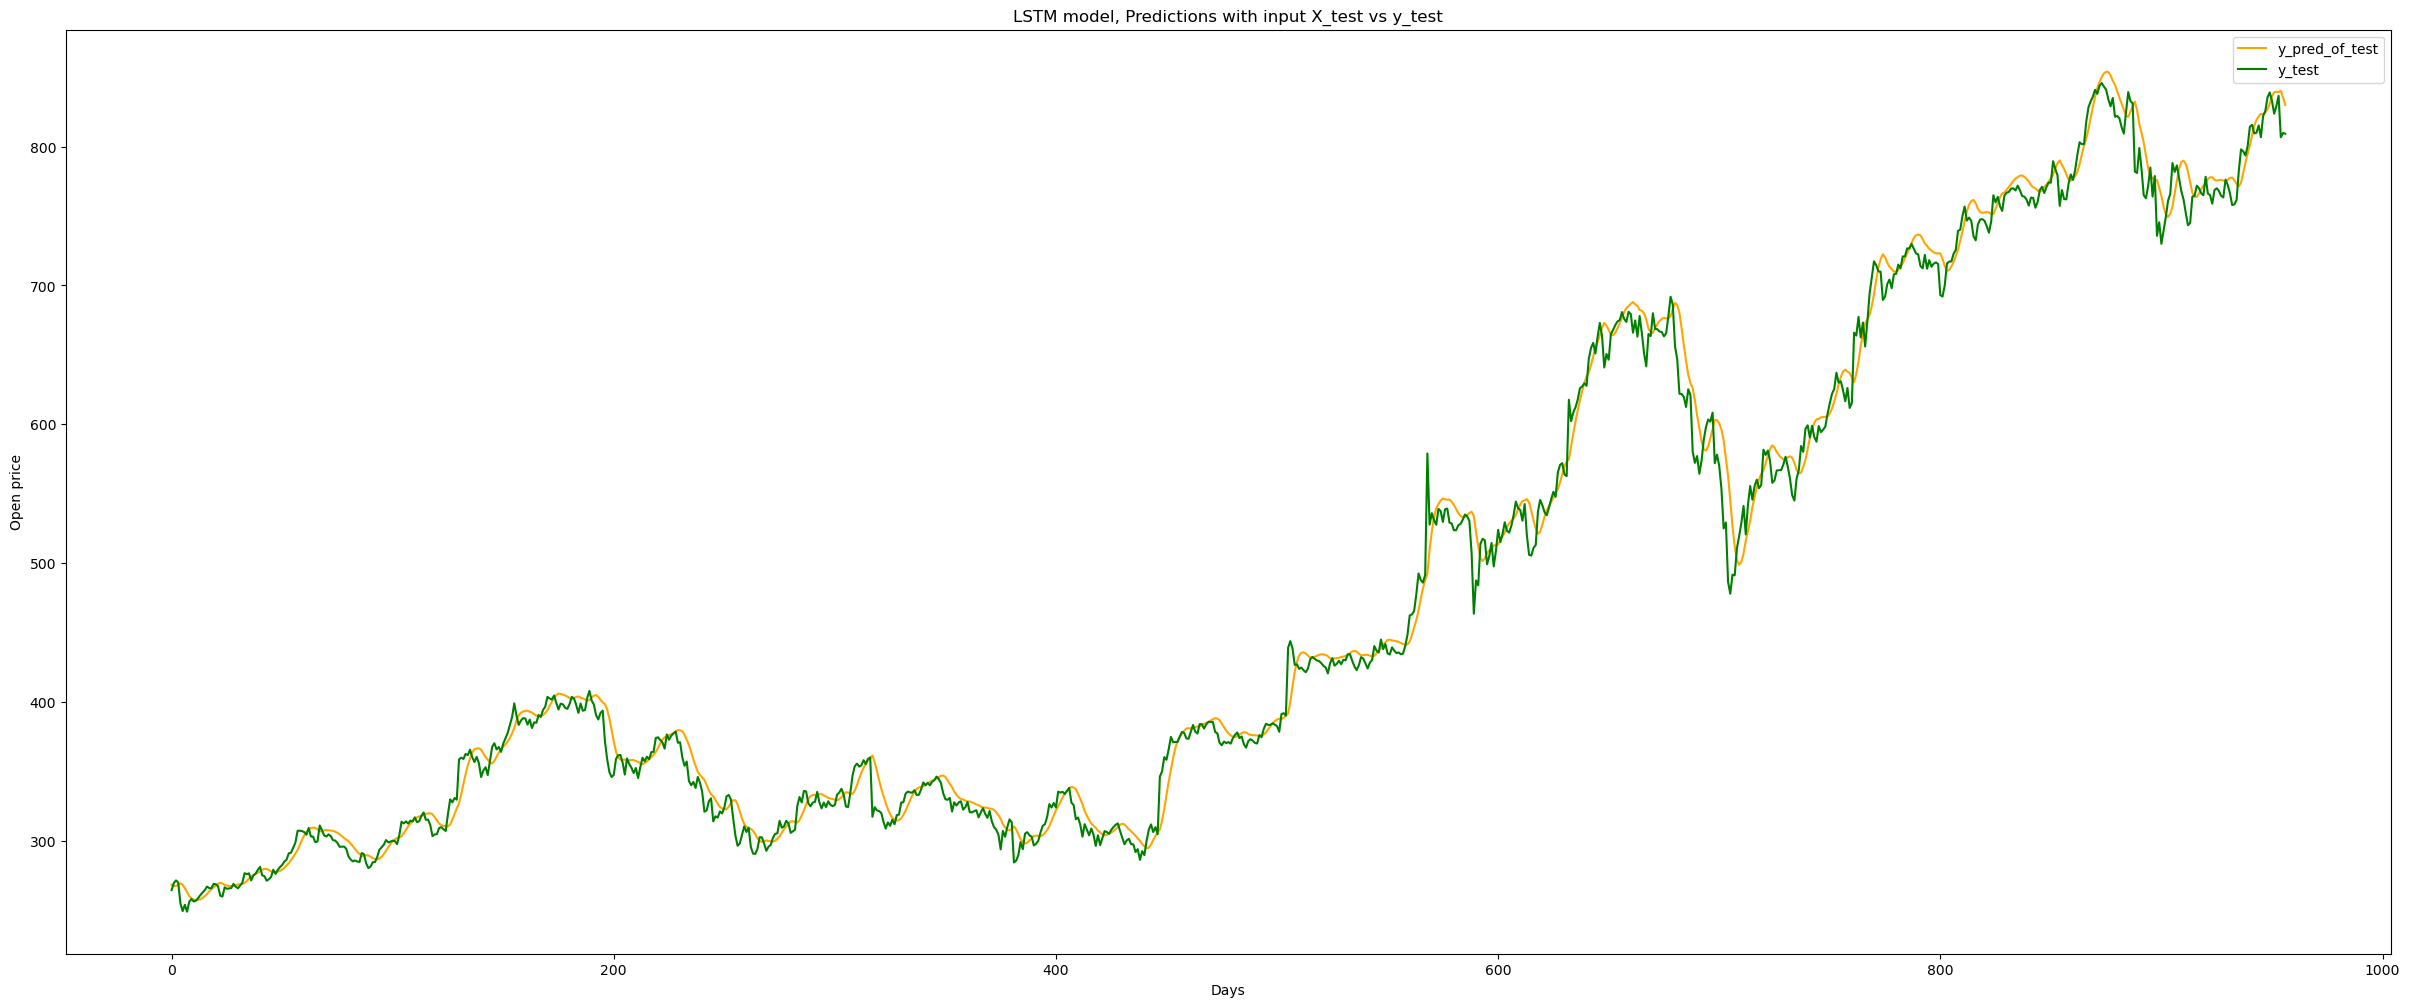

In [27]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [28]:
data.iloc[-1]

date      2018-02-07
open          1449.0
high         1460.99
low          1415.15
close        1416.78
volume       7162741
Name            AMZN
Name: 1258, dtype: object

In [29]:
X_input = data.iloc[-time_step:].open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.21310114],
        [0.2194598 ],
        [0.19058803],
        [0.11124796],
        [0.12542606],
        [0.13058173],
        [0.        ],
        [0.02786928],
        [0.08114456],
        [0.12070003],
        [0.1040873 ],
        [0.10955804],
        [0.11955432],
        [0.10153811],
        [0.14541861],
        [0.16930656],
        [0.17440495],
        [0.1782717 ],
        [0.13645347],
        [0.12551199],
        [0.11485693],
        [0.14793916],
        [0.17397531],
        [0.15492796],
        [0.12528285],
        [0.17197033],
        [0.21980351],
        [0.25563544],
        [0.30859565],
        [0.36845874],
        [0.33480365],
        [0.37659325],
        [0.41569043],
        [0.5577865 ],
        [0.52696703],
        [0.47457967],
        [0.52627961],
        [0.4838026 ],
        [0.60100822],
        [0.70621259],
        [0.68667831],
        [0.75544926],
        [0.80462865],
        [0.78741443],
        [0.92527139],
        [0

In [30]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 31ms/step
Simple RNN, Open price prediction for 3/18/2017      : 1457.6671
LSTM prediction, Open price prediction for 3/18/2017 : 1436.222
